A few people have done very nice fourier transformation analysis on the time data, and have convincingly show that the time is in minutes.  Here, my purpose is just to show that, by basic reasoning and simpler analysis, we can still pretty convincingly see the same point.

I present several pieces of evidence here.


A little bit of basic reasoning tells us that the time is most likely minutes.  

Let's estimate how long it took for Facebook to collect this many check-in events:
A typical large US city has a population of ~1M.  The largest population is found in NY, which is 8.5M (complete list found here: https://en.wikipedia.org/wiki/List_of_United_States_cities_by_population).  Let's way, we are looking at a large city with 3M people (slightly larger than Chicago), and Facebook has collected this 30M check-ins.  Let us further suppose, that through out the time, on an average day, about 1% of the population used check-in once.  This will result in 0.03M check-ins per day.  

To get 30M check-ins, it takes 1000 days.  our assumptions may not be accurate, so let's give it a range, say it takes ~500 to 2000 days to collect this many check-ins.  Now, look at the 'time' column in the data.  This ranges from 1 to 800,000. So each unit is roughly 1/800 day (assuming 1000 days), or 1/1600 to 1/400 days.  We notice that 1 min is exactly 1/1440 day, sitting nicely within the range of our estimation.  

If the unit is sec, we will have to change our assumptions drastically to make it fit, so drastic that it becomes unrealistic.  So, most likely, the time unit is min, unless Facebook is using an arbitrary unit here.

Now, to confirm, let us do a little bit of simple tests.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import cm as cm
import numpy as np


%matplotlib inline
train=pd.read_csv('../input/train.csv')
train.describe()

,row_id,x,y,accuracy,time,place_id
count,2.911802e+07,2.911802e+07,2.911802e+07,2.911802e+07,2.911802e+07,2.911802e+07
mean,1.455901e+07,4.999770e+00,5.001814e+00,8.284912e+01,4.170104e+05,5.493787e+09
std,8.405649e+06,2.857601e+00,2.887505e+00,1.147518e+02,2.311761e+05,2.611088e+09
min,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000016e+09
25%,7.279505e+06,2.534700e+00,2.496700e+00,2.700000e+01,2.030570e+05,3.222911e+09
50%,1.455901e+07,5.009100e+00,4.988300e+00,6.200000e+01,4.339220e+05,5.518573e+09
75%,2.183852e+07,7.461400e+00,7.510300e+00,7.500000e+01,6.204910e+05,7.764307e+09
max,2.911802e+07,1.000000e+01,1.000000e+01,1.033000e+03,7.862390e+05,9.999932e+09


In [2]:
# first take a look at the whole picture of time data:
# train['time'].plot(kind='hist', bins=500)
train['timeBin']=(train['time'].divide((786239.0/5000))).apply(int)
timeHist=pd.value_counts(train['timeBin'])

Nice little peaks on top of the picture show a periodic component of ~10000, very close to the number of minutes in a week: 10080

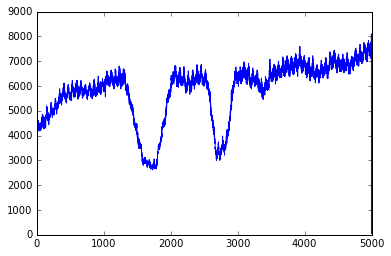

In [3]:
timeHist.sort_index(inplace=True, ascending=True)
timeHist.plot()

Now, let us take a look at what a compound week data look like.  This will require us to assume either the time is in minutes or seconds, and the resulting graphs will serve as a test.

Analysis of the time values. 

Hypothesis 1: time in sec

Hypothesis 2: time in min

Simple method:
For each hypothesis, compute for each time data point to get its corresponding hour in a week.  For each of the 168 hours in a week, get a total count of check-ins during that hour.  Plot the compound hourly activity in the week range.  The correct hypothsis should:
1.  exhibit some degree of 24 hour cycle
2.  should show some degree of weekend-weekday variation.
3.  because weeks are periodic, the start activity and the end activity in the correct week plot should be somewhat close to each other

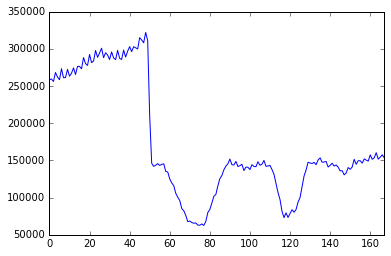

In [4]:
# Hypothesis 1, time in sec:
hourly=(train['time'].divide(3600)).apply(int)
pd.Series([len(hourly[(hourly%168)==i]) for i in range(168)]).plot()

This has no 24 hour cycle for sure.

There might be weekend-weekday variation

The data at starting and ending of the week are far apart.

Does not look very likely.

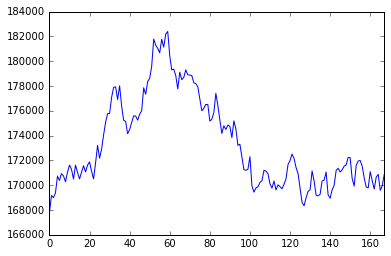

In [5]:
# Hypothesis 2, time in min:
hourly=(train['time'].divide(60)).apply(int)
pd.Series([len(hourly[(hourly%168)==i]) for i in range(168)]).plot()

There might be 24 hour cycle component, but not clear.

There might be weekend-weekday variation.

The data at starting and ending of the week are very close to each other.

This is more likely to be, although not very convincing.



Below I randomly picked some hourly numbers to serve as controls, to get a sense of what random graphs look like.  Most of them look like Hypothesis 1 (seconds).  This means the graphs produced by Hypothesis 1 is not distinguishable from random graphs.

Thus, this serves as an additional support for Hypothesis 2 (minutes).

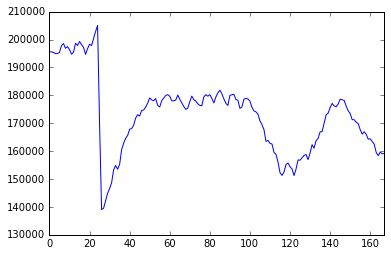

In [6]:
# random control 1:
hourly=(train['time'].divide(1485)).apply(int)
pd.Series([len(hourly[(hourly%168)==i]) for i in range(168)]).plot()

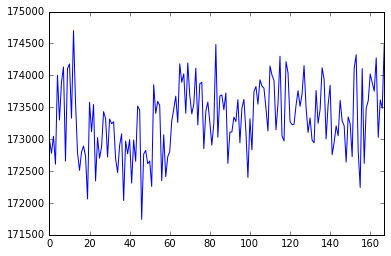

In [7]:
# random control 2:
hourly=(train['time'].divide(18)).apply(int)
pd.Series([len(hourly[(hourly%168)==i]) for i in range(168)]).plot()

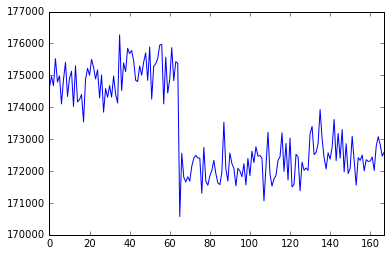

In [8]:
# random control 3:
hourly=(train['time'].divide(83)).apply(int)
pd.Series([len(hourly[(hourly%168)==i]) for i in range(168)]).plot()

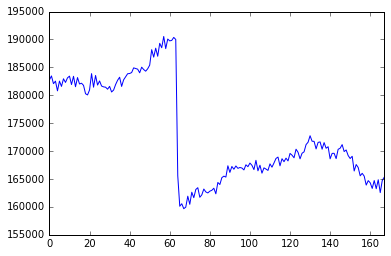

In [9]:
# random control 4:
hourly=(train['time'].divide(634)).apply(int)
pd.Series([len(hourly[(hourly%168)==i]) for i in range(168)]).plot()

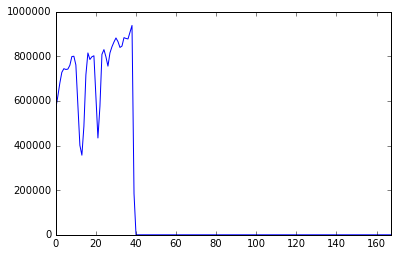

In [10]:
# random control 5:
hourly=(train['time'].divide(20059)).apply(int)
pd.Series([len(hourly[(hourly%168)==i]) for i in range(168)]).plot()